In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chart48 = pd.read_csv("../Code/output/chart48Item17.csv")

In [3]:
chart48.head()

,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE
0,36,165660,FIO,2134-05-12T12:00:00.000-04:00,100.00
1,36,165660,PH,2134-05-12T12:35:00.000-04:00,7.29
2,36,165660,HR,2134-05-12T13:00:00.000-04:00,86.00
3,36,165660,SBP,2134-05-12T13:00:00.000-04:00,137.00
4,36,165660,DBP,2134-05-12T13:00:00.000-04:00,72.00


In [4]:
chart48.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17949246 entries, 0 to 17949245
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 684.7+ MB


In [5]:
patients = pd.read_csv("../Code/output/patientsInfo.csv")

In [6]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG
0,22,165315,64.97,F,0
1,23,152223,71.18,M,0
2,23,124321,75.31,M,0
3,24,161859,39.04,M,0
4,25,129635,58.99,M,0


# Clean data--outliers

In [7]:
# chart24 initially 11,377,877 entries

In [8]:
# GLU
chart48 = chart48.drop(chart48[(chart48.ITEMID=='GLU') & (chart48.VALUE>5000)].index) ## 11,377,875 entries

In [9]:
# DBP
chart48 = chart48.drop(chart48[(chart48.ITEMID=='DBP') & (chart48.VALUE>1000)].index) ## 11,377,827 entries

In [10]:
# FIO -- ignore
# chart24 = chart24.drop(chart24[(chart24.ITEMID=='FIO') & (chart24.VALUE>100)].index) ## 11,377,827 entries

In [11]:
# HEIGHT
chart48 = chart48.drop(chart48[(chart48.ITEMID=='HEIGHT') & (chart48.VALUE>300)].index) ## 11,377,821 entries

In [12]:
# HR
chart48 = chart48.drop(chart48[(chart48.ITEMID=='HR') & (chart48.VALUE>10000)].index) ## 11,377,820 entries

In [20]:
# MBP
chart48 = chart48.drop(chart48[(chart48.ITEMID=='MBP') & (chart48.VALUE>1000)].index) ## 11,377,817 entries

In [21]:
# OS
chart48 = chart48.drop(chart48[(chart48.ITEMID=='OS') & (chart48.VALUE>10000)].index) ## 11,377,817 entries

In [22]:
# PH
chart48 = chart48.drop(chart48[(chart48.ITEMID=='PH') & (chart48.VALUE>10)].index) ## 11,377,779  entries

In [23]:
# RESPR
chart48 = chart48.drop(chart48[(chart48.ITEMID=='RESPR') & (chart48.VALUE>1000)].index) ## 11,377,775  entries

In [24]:
# SBP
chart48 = chart48.drop(chart48[(chart48.ITEMID=='SBP') & (chart48.VALUE>1000)].index) ## 11,377,768  entries

In [25]:
# TEMP
chart48 = chart48.drop(chart48[(chart48.ITEMID=='TEMP') & (chart48.VALUE>50)].index) 
chart48 = chart48.drop(chart48[(chart48.ITEMID=='TEMP') & (chart48.VALUE<20)].index) ## 11,376,623  entries

In [26]:
# weight
chart48 = chart48.drop(chart48[(chart48.ITEMID=='WEIGHT') & (chart48.VALUE>1000)].index) 
chart48 = chart48.drop(chart48[(chart48.ITEMID=='WEIGHT') & (chart48.VALUE<10)].index) ## 11,376,536  entries

In [27]:
chart48.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17947434 entries, 0 to 17949245
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 821.6+ MB


In [28]:
chart48_mean = chart48[['HADM_ID', 'ITEMID', 'VALUE']].groupby(['HADM_ID', 'ITEMID'], as_index=False).mean()

In [29]:
len(chart48_mean['HADM_ID'].unique()) ## 45851 admission, 14 itemid

45851

In [30]:
# pivot table to have each itemid as one column
chart48_pivot = chart48_mean.pivot(index='HADM_ID', columns = 'ITEMID', values='VALUE')

In [31]:
chart48_pivot.head()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT
HADM_ID,,,,,,,,,,,,,,,,,
100001,NaN,90.333333,NaN,181.219512,6.00,4.000000,NaN,5.000000,NaN,117.000000,110.410256,97.600000,NaN,17.300000,176.666667,37.152778,98.010000
100003,NaN,60.615385,NaN,93.000000,6.00,3.916667,NaN,5.000000,NaN,81.218182,73.980769,98.163265,7.370000,15.818182,116.519231,36.247475,84.743333
100006,NaN,77.666667,NaN,158.300000,6.00,4.000000,15.000000,5.000000,NaN,110.680000,97.298633,96.849057,7.366667,19.000000,136.562500,36.409091,57.000000
100007,NaN,61.046512,NaN,132.777778,6.00,3.846154,14.230769,4.384615,NaN,74.139535,86.166667,99.409091,NaN,16.613636,138.906977,36.716042,55.099998
100009,NaN,50.404255,70.0,145.593750,4.75,4.000000,NaN,4.000000,182.94,67.480000,65.340426,96.388889,7.370000,23.392857,109.042553,36.791667,116.912500


In [32]:
chart48_pivot.describe()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT
count,707.000000,45590.000000,11582.000000,45117.000000,45634.000000,45078.000000,25141.000000,45595.000000,9051.000000,45590.000000,45586.000000,45595.000000,27254.000000,45564.000000,45590.000000,45266.000000,36516.000000
mean,0.165660,60.773526,51.437699,137.432553,5.443846,3.527791,12.455453,3.722410,168.640430,84.907594,78.339436,96.944947,7.373169,18.278322,119.543801,36.834234,81.968122
std,0.329933,10.689155,24.802941,40.853054,1.018348,0.686043,3.100995,1.496881,15.034067,14.827991,11.015054,3.268487,0.141331,3.819177,16.827420,0.587077,24.413054
min,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,3.000000,1.000000,0.000000,26.357143,17.428571,13.500000,0.000000,5.272727,0.000000,30.000000,10.000000
25%,0.000000,53.500000,42.500000,112.000000,5.285714,3.333333,10.733333,2.647059,162.780000,74.553783,70.762401,96.020408,7.343797,15.642857,107.614489,36.482907,66.000000
50%,0.000000,59.740000,50.666667,129.000000,6.000000,3.818182,13.750000,4.384615,170.090000,84.015873,77.000000,97.291667,7.382000,17.782609,117.375000,36.814815,78.699997
75%,0.141429,67.000000,61.666667,152.285714,6.000000,4.000000,15.000000,5.000000,177.900000,94.420217,84.815949,98.377568,7.418136,20.400000,129.956522,37.182540,93.696249
max,2.000000,127.097561,1001.000000,771.900000,6.000000,4.000000,15.000000,5.000000,284.240000,207.485714,140.564115,288.829787,9.000000,48.000000,215.833333,40.833317,670.000000


# Null entry imputation

In [33]:
# null entry imputation-- CRR 0.0
chart48_pivot['CRR'].fillna(0.0, inplace=True)

In [34]:
# null entry imputation-- DBP 59.0
chart48_pivot['DBP'].fillna(59.0, inplace=True)

In [35]:
# null entry imputation-- FIO 0.21
chart48_pivot['FIO'].fillna(52, inplace=True)

In [36]:
# null entry imputation-- GLU 128
chart48_pivot['GLU'].fillna(128, inplace=True)

In [37]:
# null entry imputation-- GMR 6
chart48_pivot['GMR'].fillna(6, inplace=True)

In [38]:
# null entry imputation-- GO 4
chart48_pivot['GO'].fillna(4, inplace=True)

In [39]:
# null entry imputation-- GT 15
chart48_pivot['GT'].fillna(15, inplace=True)

In [40]:
# null entry imputation-- GVR 5
chart48_pivot['GVR'].fillna(5, inplace=True)

In [41]:
# null entry imputation-- HEIGHT 5
chart48_pivot['HEIGHT'].fillna(170, inplace=True)

In [42]:
# null entry imputation-- MBP 77
chart48_pivot['MBP'].fillna(77, inplace=True)

In [43]:
# null entry imputation-- HR 5
chart48_pivot['HR'].fillna(86, inplace=True)

In [44]:
# null entry imputation-- OS 98
chart48_pivot['OS'].fillna(98, inplace=True)

In [45]:
# null entry imputation-- PH 98
chart48_pivot['PH'].fillna(7.4, inplace=True)

In [46]:
# null entry imputation-- RESPR 98
chart48_pivot['RESPR'].fillna(19, inplace=True)

In [47]:
# null entry imputation-- SBP 118
chart48_pivot['SBP'].fillna(118, inplace=True)

In [48]:
# null entry imputation-- TEMP 36.6
chart48_pivot['TEMP'].fillna(36.6, inplace=True)

In [49]:
# null entry imputation-- WEIGHT 81
chart48_pivot['WEIGHT'].fillna(81, inplace=True)

In [50]:
chart48_pivot.head()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT
HADM_ID,,,,,,,,,,,,,,,,,
100001,0.0,90.333333,52.0,181.219512,6.00,4.000000,15.000000,5.000000,170.00,117.000000,110.410256,97.600000,7.400000,17.300000,176.666667,37.152778,98.010000
100003,0.0,60.615385,52.0,93.000000,6.00,3.916667,15.000000,5.000000,170.00,81.218182,73.980769,98.163265,7.370000,15.818182,116.519231,36.247475,84.743333
100006,0.0,77.666667,52.0,158.300000,6.00,4.000000,15.000000,5.000000,170.00,110.680000,97.298633,96.849057,7.366667,19.000000,136.562500,36.409091,57.000000
100007,0.0,61.046512,52.0,132.777778,6.00,3.846154,14.230769,4.384615,170.00,74.139535,86.166667,99.409091,7.400000,16.613636,138.906977,36.716042,55.099998
100009,0.0,50.404255,70.0,145.593750,4.75,4.000000,15.000000,4.000000,182.94,67.480000,65.340426,96.388889,7.370000,23.392857,109.042553,36.791667,116.912500


In [51]:
chart48_pivot.isna().any()

ITEMID
CRR       False
DBP       False
FIO       False
GLU       False
GMR       False
GO        False
GT        False
GVR       False
HEIGHT    False
HR        False
MBP       False
OS        False
PH        False
RESPR     False
SBP       False
TEMP      False
WEIGHT    False
dtype: bool

# Combine label and data together

In [52]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG
0,22,165315,64.97,F,0
1,23,152223,71.18,M,0
2,23,124321,75.31,M,0
3,24,161859,39.04,M,0
4,25,129635,58.99,M,0


In [53]:
chart48_withlabel = chart48_pivot.join(patients[['HADM_ID', 'HOSPITAL_EXPIRE_FLAG']].set_index('HADM_ID'), how='left')

In [54]:
chart48_withlabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45851 entries, 100001 to 199999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CRR                   45851 non-null  float64
 1   DBP                   45851 non-null  float64
 2   FIO                   45851 non-null  float64
 3   GLU                   45851 non-null  float64
 4   GMR                   45851 non-null  float64
 5   GO                    45851 non-null  float64
 6   GT                    45851 non-null  float64
 7   GVR                   45851 non-null  float64
 8   HEIGHT                45851 non-null  float64
 9   HR                    45851 non-null  float64
 10  MBP                   45851 non-null  float64
 11  OS                    45851 non-null  float64
 12  PH                    45851 non-null  float64
 13  RESPR                 45851 non-null  float64
 14  SBP                   45851 non-null  float64
 15  TEMP         

# Logistic model

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
X = chart48_withlabel.loc[:, 'CRR':'WEIGHT']
Y = chart48_withlabel.loc[:,'HOSPITAL_EXPIRE_FLAG']

In [57]:
# normolize X data
X = StandardScaler().fit(X).transform(X)

In [58]:
# split data to 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [59]:
# 5-fold cv score
logit = LogisticRegression(solver='liblinear')
logit_cv_score = cross_val_score(logit, X_train, Y_train, cv=5)
logit_cv_score = np.mean(logit_cv_score)
print(logit_cv_score)

0.91273173391494


In [60]:
# predict the test data
logit.fit(X_train, Y_train)
logit_preds = logit.predict(X_test)
logit_accu = accuracy_score(Y_test, logit_preds)
logit_matrix = confusion_matrix(Y_test, logit_preds)

In [61]:
logit.coef_

array([[-0.01078905, -0.42648313,  0.17152649,  0.25220726, -0.40465663,
        -0.24260919, -0.01066019, -0.71428446,  0.01070444,  0.2974429 ,
         0.08983897, -0.63766073, -0.07235028,  0.38169856, -0.11327745,
        -0.42813835, -0.29790782]])

In [62]:
logit_accu

0.9099334859884418

In [63]:
logit_matrix

array([[7996,  147],
       [ 679,  349]])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


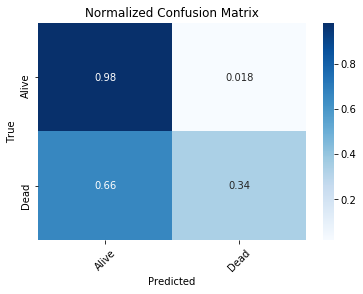

In [64]:
from plots import plot_confusion_matrix
results = [(i[0], i[1]) for i in zip(Y_test, logit_preds)]
class_names = ['Alive', 'Dead']
plot_confusion_matrix(results, class_names)

In [72]:
logit_probs = logit.predict_proba(X_test)
metrics.roc_auc_score(Y_test, logit_probs[:, 1])

0.871607276737653

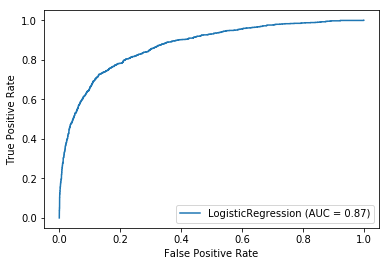

In [73]:
# auc curve
from sklearn import metrics
metrics.plot_roc_curve(logit, X_test, Y_test)  
plt.show()

## SVC model

In [75]:
# use C=1 to build the SVM model
svc = SVC(C=1, gamma="scale", probability=True)
svc.fit(X_train, Y_train)
svc_preds = svc.predict(X_test)
svc_accu = accuracy_score(Y_test, svc_preds)
svc_matrix = confusion_matrix(Y_test, svc_preds)

In [76]:
svc_accu

0.9187656744084615

In [77]:
svc_matrix

array([[8050,   93],
       [ 652,  376]])

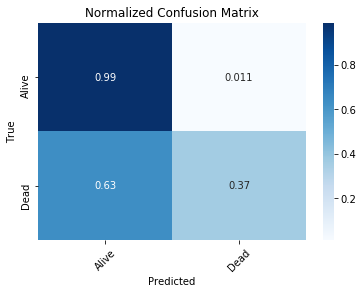

In [78]:
from plots import plot_confusion_matrix
results_svc = [(i[0], i[1]) for i in zip(Y_test, svc_preds)]
class_names = ['Alive', 'Dead']
plot_confusion_matrix(results_svc, class_names)

In [79]:
svc_probs = svc.predict_proba(X_test)
metrics.roc_auc_score(Y_test, svc_probs[:, 1])

0.8388132415179828

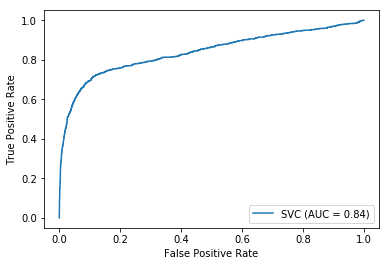

In [80]:
metrics.plot_roc_curve(svc, X_test, Y_test)  
plt.show()